# <center> MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
---

### 2. Оценка качества кластеризации: внутренние меры

##### КОЭФФИЦИЕНТ СИЛУЭТА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')
```

##### ИНДЕКС КАЛИНСКИ — ХАРАБАСА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)
```

##### ИНДЕКС ДЭВИСА — БОЛДИНА

```Python
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)
```

---

### 3. Оценка качества кластеризации: внешние меры

##### ИНДЕКС РЭНДА

In [3]:
from sklearn.metrics import rand_score

print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

0.6


##### НОРМАЛИЗОВАННАЯ ВЗАИМНАЯ ИНФОРМАЦИЯ

В *sklearn* для вычисления NMI существует метод `normalized_mutual_info_score()`.

##### ОДНОРОДНОСТЬ

Однородность также можно вычислить, воспользовавшись методом `homogeneity_score()` из библиотеки *sklearn*.

##### ПОЛНОТА

Для вычисления полноты с помощью библиотеки *sklearn* используется метод `completeness_score()`.

##### V-МЕРА

Для вычисления V-меры с помощью библиотеки *sklearn* используется метод `v_measure_score()`.

---
### 4. Меры качества кластеризации. Практика

In [27]:
# Задание 4.1
# Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30)
import numpy as np
import pandas as pd
import glob

files = glob.glob('data/Physical Activity Data/*.txt')
test, test_labels, train, train_labels = [pd.read_csv(file, header=None, sep='\s+') for file in files]

# Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке)
X = pd.concat([train, test], ignore_index=True)
y = pd.concat([train_labels, test_labels], ignore_index=True)

# Какая размерность получилась у набора данных с признаками?
X.shape

(10299, 561)

In [31]:
# Задание 4.2
# Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения
y.nunique()

0    6
dtype: int64

* 1 — ходьба;
* 2 — подъём;
* 3 — спуск;
* 4 — сидение;
* 5 — стояние;
* 6 — лежание.

In [32]:
# Задание 4.3
# Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler
from sklearn.preprocessing import StandardScaler

# Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, 
# предварительно округлив его до двух знаков после точки-разделителя
scaler = StandardScaler()
X = scaler.fit_transform(X)
round(X[0, 0], 2)

0.21

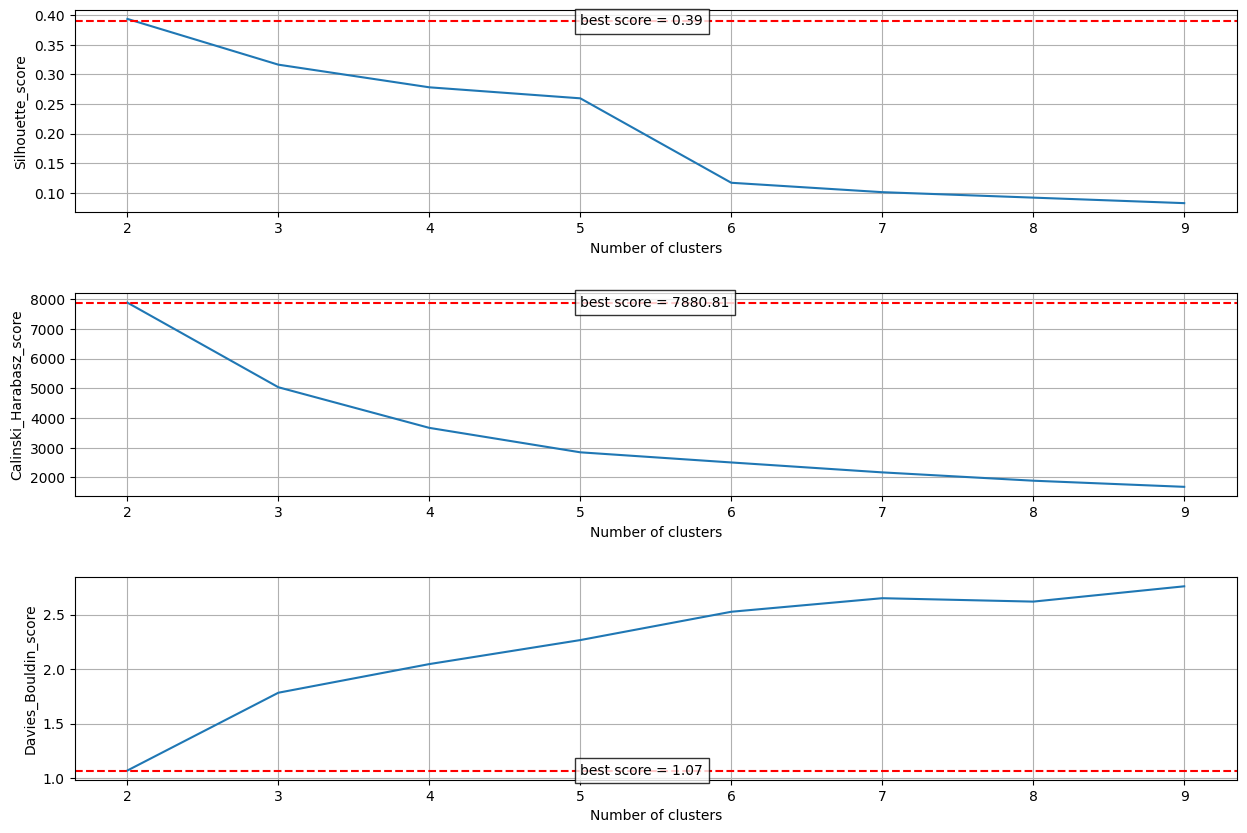

In [74]:
# Задание 4.4
# Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации
# Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина
# В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42
# Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно
# Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

Silhouette_score = []
Calinski_Harabasz_score = []
Davies_Bouldin_score = []

for n in range(2, 10):
    kmc = KMeans(n_clusters=n, random_state=42)
    kmc.fit(X)
    Silhouette_score.append(silhouette_score(X, kmc.labels_))
    Calinski_Harabasz_score.append(calinski_harabasz_score(X, kmc.labels_))
    Davies_Bouldin_score.append(davies_bouldin_score(X, kmc.labels_))

metrics = [Silhouette_score, Calinski_Harabasz_score, Davies_Bouldin_score]
metric_names = ['Silhouette_score', 'Calinski_Harabasz_score', 'Davies_Bouldin_score']
best_values = [round(max(Silhouette_score), 2),
               round(max(Calinski_Harabasz_score), 2),
               round(min(Davies_Bouldin_score), 2)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

for i, metric in enumerate(metrics):
    sns.lineplot(x=range(2, 10), y=metric, ax=ax[i])
    ax[i].set_xlabel('Number of clusters')
    ax[i].set_ylabel(metric_names[i])
    ax[i].axhline(y=best_values[i], linestyle='--', color='r', label=best_values[i])
    ax[i].text(x=5, y=best_values[i], s=f'best score = {best_values[i]}', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    ax[i].grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

In [100]:
# Задание 4.5
# Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means
# Пусть количество кластеров будет соответствовать количеству активностей. Задайте следующие значения параметров: random_state=42, init='random'
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score

kmc = KMeans(n_clusters=6, init='random',random_state=42)
kmc.fit(X)

# В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя
metrics = [homogeneity_score, completeness_score, adjusted_rand_score]
metric_names = ['homogeneity_score', 'completeness_score', 'adjusted_rand_score']
for i, metric in enumerate(metrics):
    print(f'{metric_names[i]} = {metric(y.values.flatten(), kmc.labels_):.2f}')

homogeneity_score = 0.54
completeness_score = 0.58
adjusted_rand_score = 0.42


In [151]:
# Задание 4.6
# Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью)
# Нумерацию кластеров начинайте с 1
# Заметьте, что кластеры могут повторяться
replacement_dict = {1: 'ходьба',
                    2: 'подъём',
                    3: 'спуск',
                    4: 'сидение',
                    5: 'стояние',
                    6: 'лежание'}

y_true = pd.Series(y.values.flatten(), name='y_true').map(replacement_dict)
y_pred = pd.Series(kmc.labels_ + 1, name='y_pred')
pd.crosstab(y_true, y_pred)

y_pred,1,2,3,4,5,6
y_true,,,,,,
лежание,0,5,329,1556,0,54
подъём,297,1236,2,0,9,0
сидение,0,1,447,91,0,1238
спуск,882,310,0,0,214,0
стояние,0,0,560,0,0,1346
ходьба,741,897,0,0,84,0


In [156]:
# Задание 4.7
# Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) 
# и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1
kmc_2 = KMeans(n_clusters=2, init='random',random_state=42)
kmc_2.fit(X)

y_true = pd.Series(y.values.flatten(), name='y_true').map(replacement_dict)
y_pred = pd.Series(kmc_2.labels_ + 1, name='y_pred')
pd.crosstab(y_true, y_pred)

y_pred,1,2
y_true,,
лежание,12,1932
подъём,1536,8
сидение,3,1774
спуск,1406,0
стояние,0,1906
ходьба,1722,0


In [158]:
# Задание 4.8
# Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя
print(f'completeness_score = {completeness_score(y.values.flatten(), kmc_2.labels_):.2f}')

completeness_score = 0.98


In [160]:
# Задание 4.10
# Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты
from sklearn.cluster import AgglomerativeClustering

aggc = AgglomerativeClustering(n_clusters=2)
aggc.fit(X)
print(f'completeness_score = {completeness_score(y.values.flatten(), aggc.labels_):.2f}')

completeness_score = 1.00


---
### 5. PCA